<a href="https://colab.research.google.com/github/NeZorinEgor/MachineVision-Learning/blob/main/tricolor_rotating_pyramid/tricolor_rotating_pyramid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
w_gauss = [np.array([
      [1/16,0,-1/16],
      [1/8,0,-1/8],
      [1/16,0,-1/16]
       ]),
       np.array([
      [1/16,1/8,1/16],
      [0,0,0],
      [-1/16,-1/8,-1/16]
       ]),
       np.array([
      [0,1/8,1/16],
      [-1/8,0,1/8],
      [-1/16,-1/8,0]
       ]),
       np.array([
      [1/16,1/8,0],
      [1/8,0,-1/8],
      [0,-1/8,-1/16]
       ]),
       np.array([
      [1/16,1/8,1/16],
      [1/8,1/4,1/8],
      [1/16,1/8,1/16]
       ])]

In [8]:
def apply_filter(image, filt):
    return cv2.filter2D(image, -1, filt)

In [12]:
def create_pyramid(image):
    pyramid = []
    for filt in w_gauss:
        filtered = apply_filter(image, filt)
        downsampled = cv2.resize(filtered, (256, 256), interpolation=cv2.INTER_AREA)
        upsampled = cv2.resize(downsampled, (512, 512), interpolation=cv2.INTER_LINEAR)
        pyramid.append(upsampled)
    return pyramid

In [14]:
image = cv2.imread('clocks.jpg')
pyramid = create_pyramid(image)

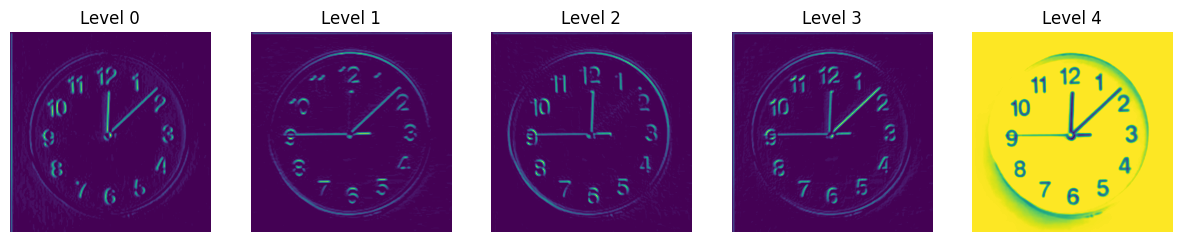

In [16]:
def increase_contrast(image, alpha=1.0, beta=0.0):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

pyramid_contrast = [increase_contrast(level, alpha=1.5, beta=0) for level in pyramid]

fig, axs = plt.subplots(1, len(pyramid_contrast), figsize=(15, 5))

for i, level in enumerate(pyramid_contrast):
    axs[i].imshow(cv2.cvtColor(level, cv2.COLOR_BGR2GRAY))
    axs[i].set_title(f'Level {i}')
    axs[i].axis('off')

plt.show()